In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
q1 = data.resting_blood_pressure.quantile(0.25)
q2 = data.resting_blood_pressure.quantile(0.75)
print(q1,q2)
IQR = q2-q1
print(IQR)
lower_limit = q1-1.5*IQR
upper_limit = q2+1.5*IQR
print(lower_limit,upper_limit)

q3 = data.cholesterol.quantile(0.25)
q4 = data.cholesterol.quantile(0.75)
print(q3,q4)
IQR = q4-q3
print(IQR)
lower_limit1 = q3-1.5*IQR
upper_limit1= q4+1.5*IQR
print(lower_limit1,upper_limit1)

q5 = data.max_heart_rate_achieved.quantile(0.25)
q6 = data.max_heart_rate_achieved.quantile(0.75)
print(q5,q6)
IQR = q6-q5
print(IQR)
lower_limit2 = q5-1.5*IQR
upper_limit2 = q6+1.5*IQR
print(lower_limit2,upper_limit2)

df_no_outlier =data[(data.resting_blood_pressure>lower_limit)&(data.resting_blood_pressure<upper_limit)&(data.cholesterol>lower_limit1)&(data.cholesterol<upper_limit1)&(data.max_heart_rate_achieved>lower_limit2)&(data.max_heart_rate_achieved<upper_limit2)]
#df_no_outlier = data[(data.max_heart_rate_achieved>lower_limit2)&(data.max_heart_rate_achieved<upper_limit2)]
X = df_no_outlier.drop('target',axis=1)
y = df_no_outlier['target']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [6]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [7]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
ytrain_pred = rf_model.predict_proba(X_train)
print('RF train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = rf_model.predict_proba(X_test)
print('RF test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

RF train roc-auc: 0.9999999999999999
RF test roc-auc: 0.8604878048780488


In [9]:
from sklearn.linear_model import LogisticRegression
log_classifier=LogisticRegression()
log_classifier.fit(X_train, y_train)
ytrain_pred = log_classifier.predict_proba(X_train)
print('Logistic train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = log_classifier.predict_proba(X_test)
print('Logistic test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))


Logistic train roc-auc: 0.9367099955177052
Logistic test roc-auc: 0.8707317073170732


/home/nisarga/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [10]:
from sklearn.ensemble import AdaBoostClassifier
ada_classifier=AdaBoostClassifier()
ada_classifier.fit(X_train, y_train)
ytrain_pred = ada_classifier.predict_proba(X_train)
print('Adaboost train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = ada_classifier.predict_proba(X_test)
print('Adaboost test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Adaboost train roc-auc: 0.9919318691169878
Adaboost test roc-auc: 0.813170731707317


In [11]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier=KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
ytrain_pred = knn_classifier.predict_proba(X_train)
print('Adaboost train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = knn_classifier.predict_proba(X_test)
print('Adaboost test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Adaboost train roc-auc: 0.8685791125056028
Adaboost test roc-auc: 0.6178048780487805


In [12]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train)
ytrain_pred = model.predict_proba(X_train)
print('xgboost train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = knn_classifier.predict_proba(X_test)
print('xgboost test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

[15:08:22] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
xgboost train roc-auc: 1.0
xgboost test roc-auc: 0.6178048780487805


/home/nisarga/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [13]:
pred=[]
for model in [rf_model,log_classifier,ada_classifier,knn_classifier,model]:
    pred.append(pd.Series(model.predict_proba(X_test)[:,1]))
final_prediction=pd.concat(pred,axis=1).mean(axis=1)
print('Ensemble test roc-auc: {}'.format(roc_auc_score(y_test,final_prediction)))

Ensemble test roc-auc: 0.8351219512195122


In [14]:
pd.concat(pred,axis=1)

,0,1,2,3,4
0,0.16,0.001704,0.492998,0.2,0.007949
1,0.83,0.775028,0.524752,0.6,0.994028
2,0.10,0.082235,0.471629,0.8,0.002566
3,0.00,0.005923,0.455544,0.6,0.000321
4,0.11,0.020976,0.459738,0.2,0.041957
...,...,...,...,...,...
86,0.54,0.742137,0.535638,0.4,0.513799
87,0.69,0.779362,0.546476,0.4,0.940602
88,0.99,0.949413,0.537390,1.0,0.999267
89,0.18,0.010784,0.463222,0.6,0.010045


In [15]:
final_prediction

0     0.172530
1     0.744762
2     0.291286
3     0.212357
4     0.166534
        ...   
86    0.546315
87    0.671288
88    0.895214
89    0.252810
90    0.432169
Length: 91, dtype: float64

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [30]:
#### Calculate the ROc Curve
from sklearn.metrics import precision_recall_curve

#fpr, tpr, thresholds = roc_curve(y_test, final_prediction)
precision, recall, thresholds = precision_recall_curve(y_test, final_prediction)
thresholds

array([0.15809703, 0.1629714 , 0.16612113, 0.16653407, 0.17253014,
       0.19287786, 0.2079738 , 0.21235744, 0.21291202, 0.21800956,
       0.22370449, 0.24304795, 0.2479613 , 0.25281015, 0.26034877,
       0.2732856 , 0.28840995, 0.29128607, 0.29158431, 0.31085873,
       0.31132286, 0.32978364, 0.35983302, 0.37252427, 0.38693095,
       0.4308866 , 0.43216922, 0.45095828, 0.48948433, 0.49673857,
       0.49784137, 0.50480405, 0.51754537, 0.54631462, 0.55028684,
       0.55546766, 0.55835729, 0.56037246, 0.57610124, 0.58272534,
       0.58786255, 0.62186686, 0.62649811, 0.63157113, 0.67128787,
       0.6803837 , 0.68136207, 0.68731844, 0.68761233, 0.69473442,
       0.69971808, 0.71503265, 0.72620441, 0.73006656, 0.73236124,
       0.74447016, 0.74476166, 0.74520412, 0.75353907, 0.76604343,
       0.77098523, 0.773745  , 0.78490759, 0.78525795, 0.78532488,
       0.7894049 , 0.79134667, 0.80580072, 0.81316482, 0.81656299,
       0.83269537, 0.83557093, 0.83838212, 0.84230561, 0.84471

In [31]:
fscore = (2 * precision * recall) / (precision + recall)
# locate the index of the largest f score
ix = argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))

Best Threshold=0.291584, F-Score=0.835


In [29]:
from numpy import sqrt
from numpy import argmax
gmeans = sqrt(tpr * (1-fpr))
print(gmeans)
ix = argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
J = tpr - fpr
ix = argmax(J)
best_thresh = thresholds[ix]
print('Best Threshold=%f' % (best_thresh))

[0.         0.14142136 0.52915026 0.51608281 0.55171573 0.54459652
 0.5934603  0.58559955 0.61564957 0.60727299 0.68858285 0.66918225
 0.72851335 0.71771997 0.72884807 0.71771997 0.74963406 0.73782806
 0.74800548 0.73584198 0.75546787 0.74277003 0.76157731 0.74833148
 0.76636615 0.75255662 0.76125698 0.74702663 0.76381584 0.73385052
 0.74963406 0.63091107 0.63744918 0.43728653 0.4417261  0.        ]
Best Threshold=0.450958, G-Mean=0.766
Best Threshold=0.359833


In [17]:
from sklearn.metrics import accuracy_score
accuracy_ls = []
for thres in thresholds:
    y_pred = np.where(final_prediction>thres,1,0)
    accuracy_ls.append(accuracy_score(y_test, y_pred, normalize=True))
    
accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls)],
                        axis=1)
accuracy_ls.columns = ['thresholds', 'accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_ls.head()

,thresholds,accuracy
30,0.291584,0.78022
29,0.311323,0.78022
28,0.359833,0.78022
27,0.386931,0.78022
25,0.432169,0.78022


In [18]:
accuracy_ls

,thresholds,accuracy
30,0.291584,0.780220
29,0.311323,0.780220
28,0.359833,0.780220
27,0.386931,0.780220
25,0.432169,0.780220
26,0.430887,0.769231
24,0.450958,0.769231
23,0.496739,0.769231
22,0.497841,0.758242
21,0.517545,0.758242


In [19]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

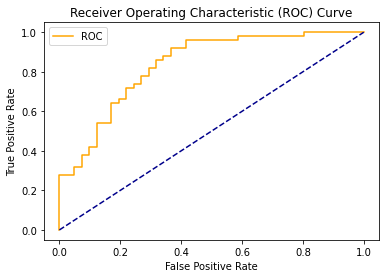

In [20]:
plot_roc_curve(fpr,tpr)

In [25]:
threshold = 0.291584

predicted_proba = rf_model.predict_proba(X_test)
predicted = (predicted_proba [:,1] >= threshold).astype('int')

accuracy = accuracy_score(y_test,ytest_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

ValueError: Classification metrics can't handle a mix of binary and continuous-multioutput targets